In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the data
Bank=pd.read_csv('bank-full.csv')
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
Bank.shape

(45211, 17)

In [ ]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print("Missing Value:-",Bank.isnull().sum())

Missing Value:- age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
Categorical_col= Bank.select_dtypes(include='object')

In [ ]:
Categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

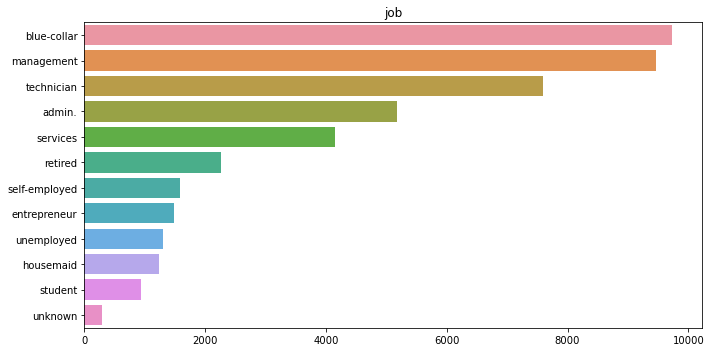

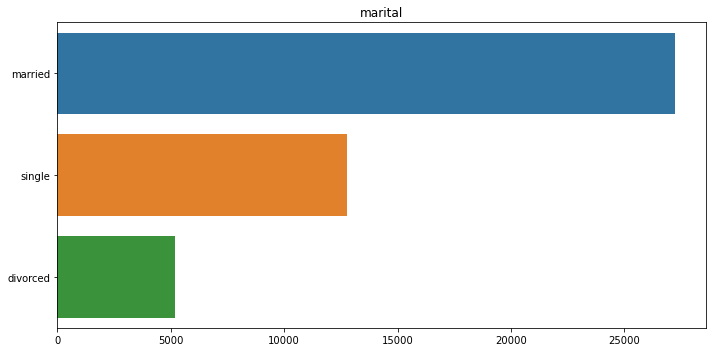

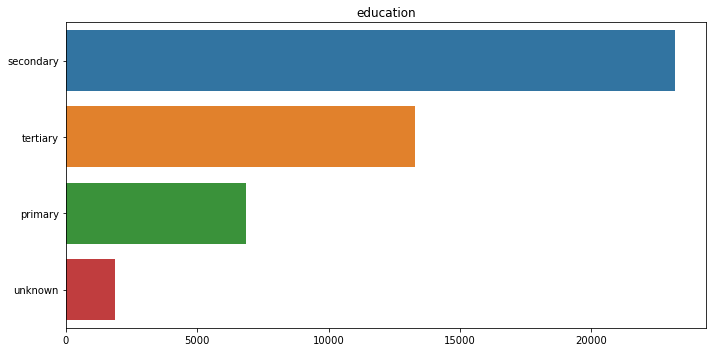

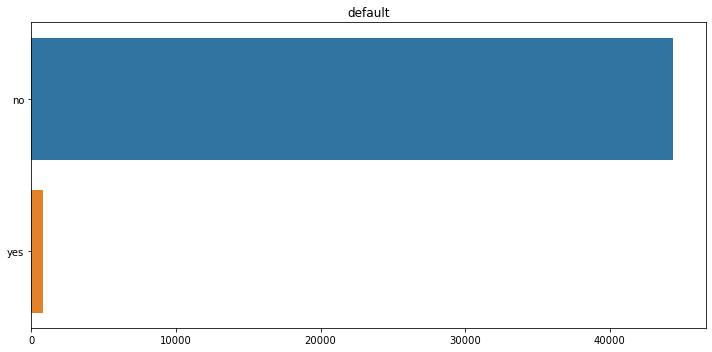

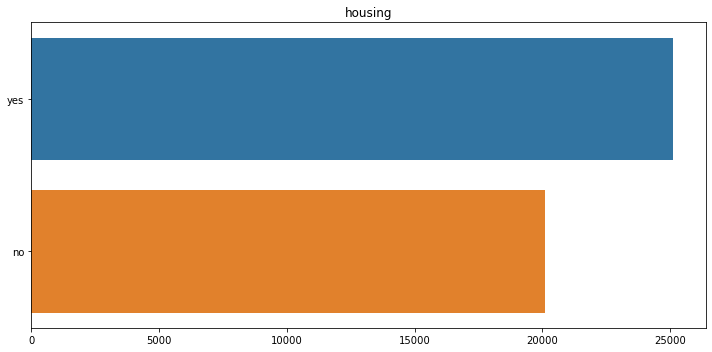

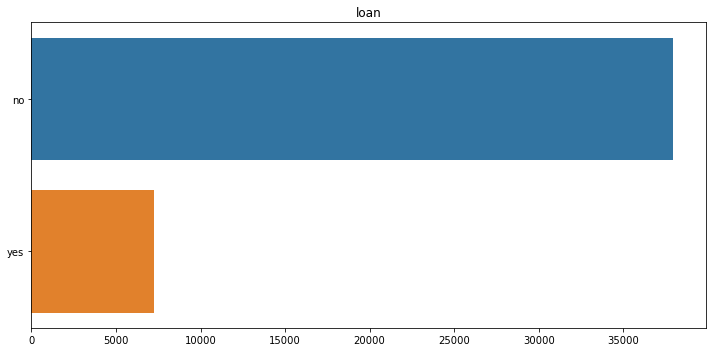

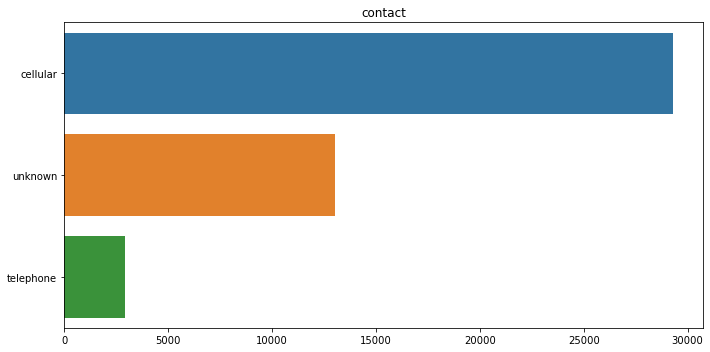

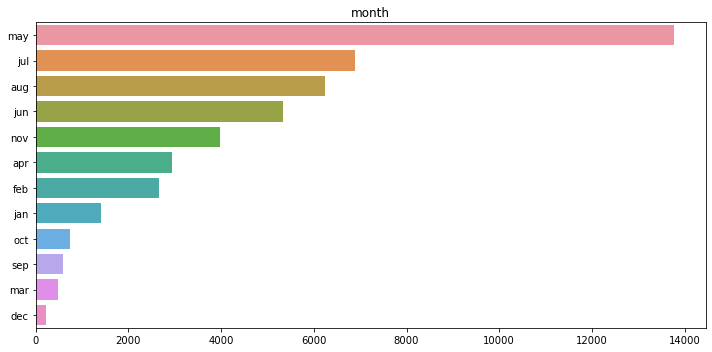

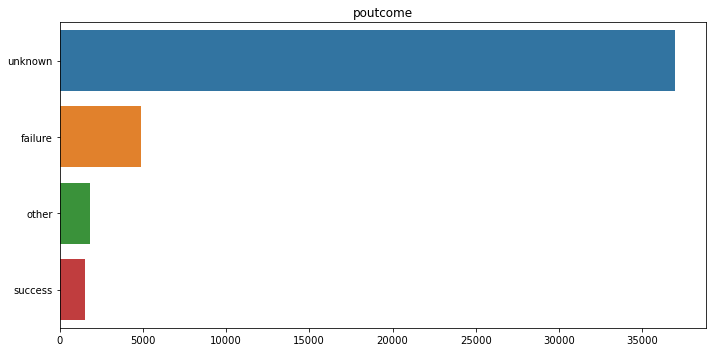

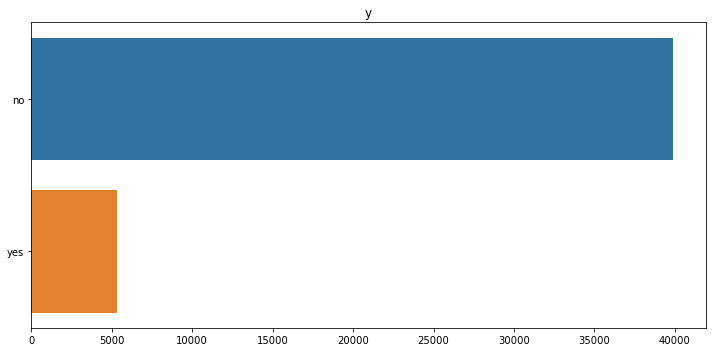

In [ ]:


for col in Categorical_col:
    plt.figure(figsize=(10,5))
    sns.barplot(Bank[col].value_counts().values, Bank[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

There are unknown values in some columns 
* Job
* Education
* Contact
* Poutcome (Highest Value)

In [ ]:
## Correlation Matrix 
Bank.y=Bank.y.map({'no':0,'yes':1}).astype('uint8')

In [ ]:
import seaborn as sns
corr = Bank.corr().round(3)
corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001,0.025
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017,0.053
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052,-0.028
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001,0.395
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033,-0.073
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455,0.104
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000,0.093
y,0.025,0.053,-0.028,0.395,-0.073,0.104,0.093,1.000


Text(0.5, 1.05, 'Pearson Correlation of Feature')

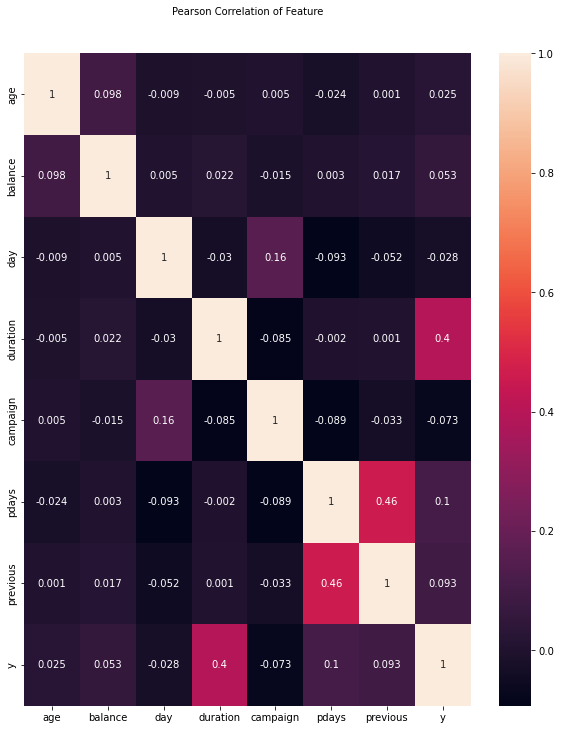

In [ ]:

plt.figure(figsize=(10,12))
ax=sns.heatmap(corr, annot=True)
plt.title('Pearson Correlation of Feature',y=1.05,size=10)

In [ ]:
#drop marital and contact columns
Bank.drop(['marital'],axis=1, inplace=True)
Bank.drop(['contact'],axis=1, inplace=True)
Bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


In [ ]:
Bank.shape

(45211, 15)

In [ ]:
Bank[['default','housing','loan']]=Bank[['default','housing','loan']].replace(["yes","no"],["1","0"])
Bank['month']=Bank['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
Bank['job']=Bank['job'].replace(['unknown'],['other'])

Bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
Bank['job']=Le.fit_transform(Bank['job'])

Bank['education']=Le.fit_transform(Bank['education'])

Bank['poutcome']=Le.fit_transform(Bank['poutcome'])


In [ ]:
Bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


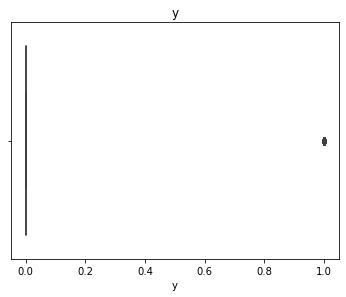

In [ ]:
col_name=Bank[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
      n=1
      plt.figure(figsize=(20,20))
      plt.subplot(4,3,1)
      sns.boxplot(Bank[i])
      plt.title(i)
      plt.show()
      n=n+1

In [ ]:
from scipy import stats
import numpy as np
z= np.abs(stats.zscore(Bank[['age','balance','duration','campaign','pdays','previous']]))
print(z)
Bank=Bank[(z<3).all(axis=1)]
Bank.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 15)

#### Checking Outliers removals

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


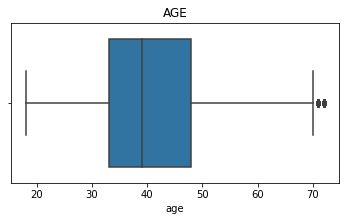

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(Bank['age'])
plt.title("AGE")
plt.show()

### Seprate independent variable and dependent variable

In [ ]:
x=Bank.drop(['y'],axis=1)
y=Bank['y']
Bank['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

### Handling imbalancing data


<AxesSubplot:xlabel='y', ylabel='count'>

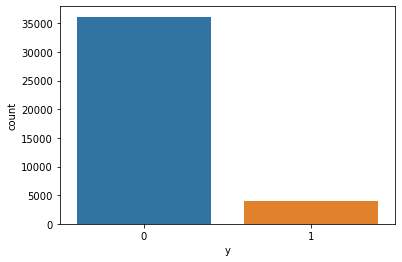

In [ ]:
sns.countplot(x='y',data=Bank)

* When Observation is one class is higher than other observation in other class then there is class imbalnce problem, to solve this we use Random Over Sampling

# Random Over Sampling

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

sm= SMOTE(random_state=42)
x_new,y_new=sm.fit_resample(x,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resample dataset shapeCounter({0: 36155, 1: 36155})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

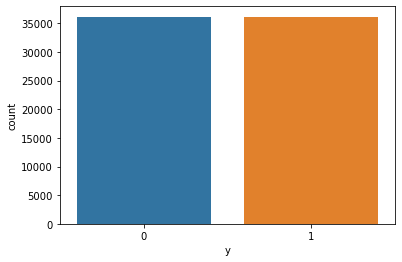

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resample dataset shape{}'. format(Counter(y_new)))
sns.countplot(y_new)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling


(57848, 14) (14462, 14) (57848,) (14462,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)



In [ ]:
pred

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [ ]:
acc=accuracy_score(ytest,pred)
acc

0.8019637671138156

In [ ]:
recall=recall_score(ytest,pred)
recall

0.8009569377990431

In [ ]:
precision=precision_score(ytest,pred)
precision

0.8062474198431264

In [ ]:
f1score=f1_score(ytest,pred)
f1score

0.8035934714030997

In [ ]:
AUC=roc_auc_score(pred,ytest)
AUC


0.8019423339660385

In [ ]:
print("ROC_AUC Score:",AUC)



ROC_AUC Score: 0.8019423339660385


[[5739 1408]
 [1456 5859]]


<AxesSubplot:>

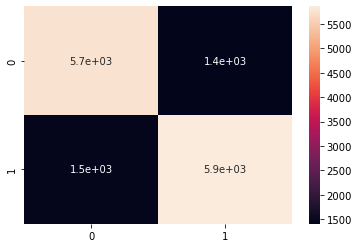

In [ ]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7195
           1       0.80      0.81      0.80      7267

    accuracy                           0.80     14462
   macro avg       0.80      0.80      0.80     14462
weighted avg       0.80      0.80      0.80     14462



In [ ]:
a = model.predict_proba(x)
a.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(40209, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'True Positive Rate')

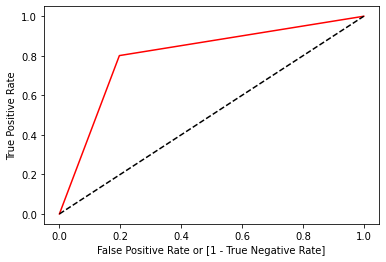

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fpr, tpr, thresholds = roc_curve(y, model.predict_proba(x)[:,1])

# auc = roc_auc_score(y, pred)
fpr, tpr, thresholds = roc_curve(ytest, pred)

auc = roc_auc_score(y,model.predict_proba(x)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')